# Semmelweiss Analysis


<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>


In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt

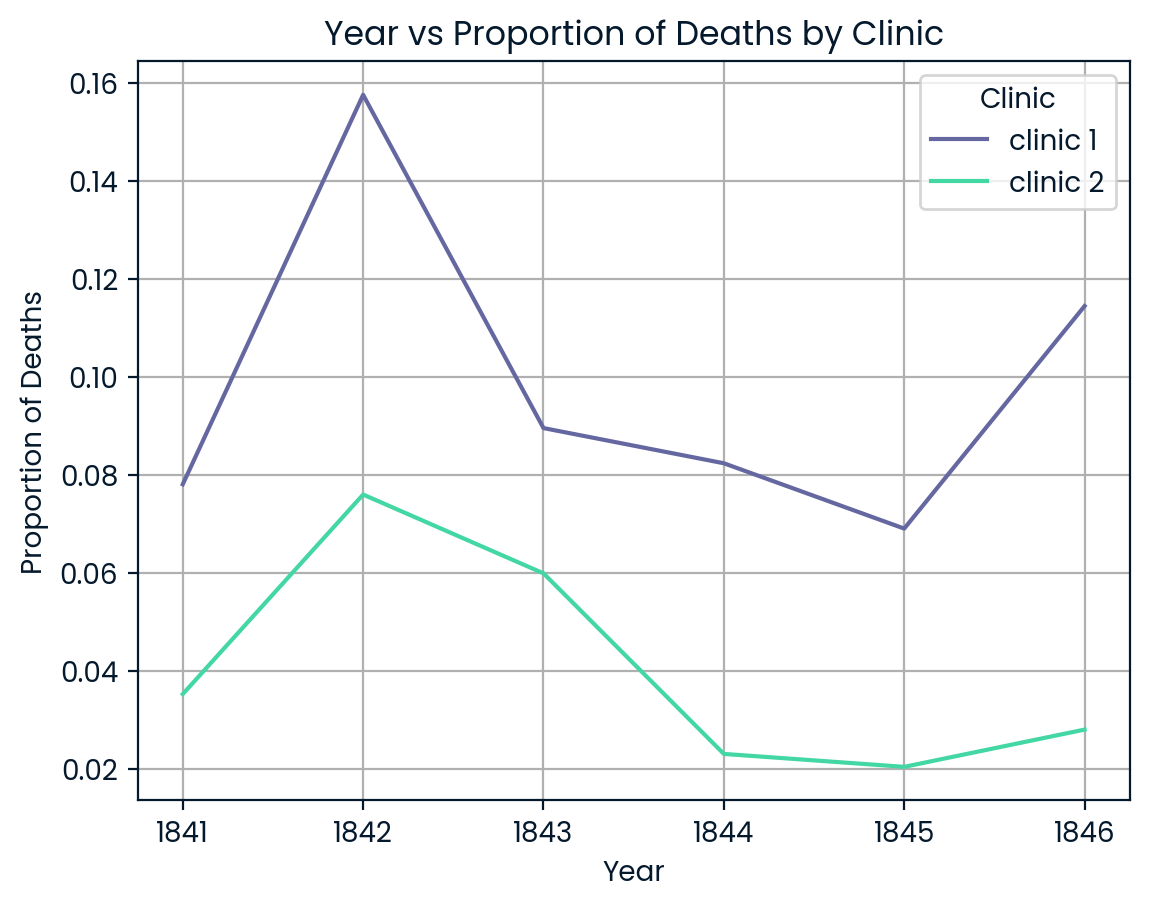

In [ ]:


# What year had the highest yearly proportion of deaths at each clinic?

# Loading and inspecting the yearly data
yearly = pd.read_csv('data/yearly_deaths_by_clinic.csv')
yearly.head()

# Adding proportion_deaths to the DataFrames
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Plotting the year versus proportion deaths and separate by clinic using a for loop

for clinic in yearly['clinic'].unique():
    clinic_data = yearly[yearly['clinic'] == clinic]
    plt.plot(clinic_data['year'], clinic_data['proportion_deaths'], label=clinic)


# For neater plot
plt.xlabel('Year')
plt.ylabel('Proportion of Deaths')
plt.title('Year vs Proportion of Deaths by Clinic')
plt.legend(title='Clinic')
plt.grid(True)
plt.show()





In [7]:
# Identifying the highest year in the visualization and save the integer year
highest_year = 1842

# What are the mean proportions of deaths before and after handwashing from the monthly data?
# Loading and inspecting the monthly data
monthly = pd.read_csv("data/monthly_deaths.csv")
monthly.head()

# Adding proportion_deaths to the DataFrame
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Adding the threshold as the date handwashing was introduced
handwashing_start = '1847-06-01'

# Creating a boolean column that shows True after the date handwashing was introduced
monthly['handwashing_started'] = monthly['date'] >= handwashing_start

# Group by the new boolean column calculate the mean proportion of deaths
# Reset the index to store the result as a DataFrame
monthly_summary = monthly.groupby('handwashing_started').agg(
    mean_proportion_deaths=('proportion_deaths', 'mean')
).reset_index()

print(monthly_summary)

# Analyzing the difference in the mean monthly proportion of deaths and calculate a 95% confidence interval

# Splitting the monthly data into before and after handwashing was introduced
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

# Performing a bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093
0.025   -0.101018
0.975   -0.068091
dtype: float64
